In [3]:
!pip install face_recognition


     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=f922679441d223e08ad1834f35f2454d64def9f16354f85c5a8b12a2d86678cb
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


## Find faces in the image and put a box over them:


I found 2 face(s) in this photograph.
A face is located at pixel location Top: 196, Left: 268, Bottom: 325, Right: 397
A face is located at pixel location Top: 150, Left: 150, Bottom: 305, Right: 304


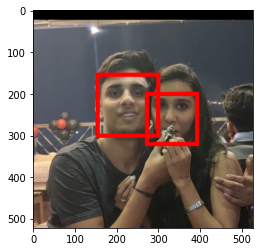

In [4]:
import PIL.Image
import PIL.ImageDraw
import face_recognition


# Load the jpg file into a numpy array
image = face_recognition.load_image_file('image.jpeg')   #You can use any image insthead of 'image.jpeg' which I have used here.

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red", width = 10)

# Display the image on screen
import matplotlib.pyplot as plt

plt.imshow(pil_image)
plt.show()


##Trace the 16 point facial features of face:


I found 3 face(s) in this photograph.


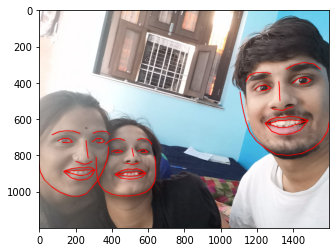

In [5]:
import PIL.Image
import PIL.ImageDraw


# Load the jpg file into a numpy array
image = face_recognition.load_image_file('WhatsApp Image 2020-05-26 at 4.25.18 PM.jpeg')


# Find all facial features in all the faces in the image
face_landmarks_list  = face_recognition.face_landmarks(image)

number_of_faces = len(face_landmarks_list)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=5)

plt.imshow(pil_image)
plt.show()



## Recognise faces and label them

A face is located at pixel location Top: 1376, Left: 861, Bottom: 1838, Right: 1324
A face is located at pixel location Top: 1119, Left: 1632, Bottom: 1581, Right: 2094
A face is located at pixel location Top: 1324, Left: 2402, Bottom: 1786, Right: 2864
Found Abhishek in the photo!
Found Akshat in the photo!
Found Aryan in the photo!


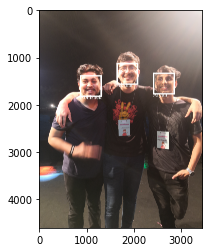

In [18]:
import matplotlib.pyplot as plt
from PIL import ImageFont

# Load the known images
image_of_Aryan = face_recognition.load_image_file("Aryan.jpeg")
image_of_Srishti = face_recognition.load_image_file("Runna.jpeg")
image_of_Dimple = face_recognition.load_image_file("Mummy.jpeg")
image_of_Priyanshi = face_recognition.load_image_file("Nanni.jpeg")
image_of_Abhishek = face_recognition.load_image_file("Abhishek.jpeg")
image_of_Akshat = face_recognition.load_image_file("Akshat.jpeg")
# Get the face encoding of each person. This can fail if no one is found in the photo.
Aryan_face_encoding = face_recognition.face_encodings(image_of_Aryan)[0]
Srishti_face_encoding = face_recognition.face_encodings(image_of_Srishti)[0]
Dimple_face_encoding = face_recognition.face_encodings(image_of_Dimple)[0]
Priyanshi_face_encoding = face_recognition.face_encodings(image_of_Priyanshi)[0]
Abhishek_face_encoding = face_recognition.face_encodings(image_of_Abhishek)[0]
Akshat_face_encoding = face_recognition.face_encodings(image_of_Akshat)[0]
# Create a list of all known face encodings
known_face_encodings = [
    Aryan_face_encoding,
    Srishti_face_encoding,
    Dimple_face_encoding,
    Priyanshi_face_encoding,
    Abhishek_face_encoding,
    Akshat_face_encoding
]
list_of_names = ["Aryan", "Srishti", "Dimple", "Priyanshi", "Abhishek", "Akshat"]

# Load the image we want to check
image = face_recognition.load_image_file("test_image.jpg")

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(image)


# Get the face locations of each face
pil_image = PIL.Image.fromarray(image)
face_locations = face_recognition.face_locations(image)
face_landmarks_list  = face_recognition.face_landmarks(image)

for  face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="white", width = 30)

count = 0
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
    # results output a list with 0 or 1 as output
    name = "Unknown"
    
    # 
    for i in range(len(list_of_names)):
      if results[i]:
        name = list_of_names[i]
        break
    # Get location of each face
    top, right, bottom, left = face_locations[count]
    font = ImageFont.truetype("times-ro.ttf", 120)
    # draw.text((x, y),"Sample Text",(r,g,b))
    # Label the faces
    draw.text((left, bottom),name,(255,255,255), font = font)
    count = count + 1
    print(f"Found {name} in the photo!")
# Display the output image
plt.imshow(pil_image)
plt.show()
# Save the output image
pil_image.save('output.jpg')